In [6]:
from diffusers import StableDiffusionPipeline
from safetensors.torch import load_file
import torch

# Базовая модель Stable Diffusion
base_model = "runwayml/stable-diffusion-v1-5"

# Загрузка пайплайна
pipe = StableDiffusionPipeline.from_pretrained(base_model, torch_dtype=torch.float16)
pipe.to("cuda")  # Используйте GPU

# Загрузка LoRA модели
lora_weights = "courseworkmodel.safetensors"
state_dict = load_file(lora_weights)

# Применение LoRA к модели
for key, value in state_dict.items():
    if key in pipe.unet.state_dict():
        pipe.unet.state_dict()[key].copy_(value)

# Генерация изображения
prompt = "View from above. Monochrome technical architectural blueprint, detailed industrial site layout.VST V=10000m3 4 things, VST V=5000m3 2 things, VST V=4500m3 4 things, VST V=2000m3 6 things, VST V=100m3 8 things, HST V=75m3 5 things, HST V=60m3 6 things, HST V=50m3 8 things. buildings administration/office 4 things. Precise and professional schematic style, fine linework"

truncated_prompt = pipe.tokenizer(prompt, max_length=77, truncation=True)["input_ids"]
prompt = pipe.tokenizer.decode(truncated_prompt)

image = pipe(prompt).images[0]

# Сохранение изображения
image.save("generated_image.png")
print("Изображение сохранено как 'generated_image.png'")


Couldn't connect to the Hub: (ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: fa942d10-63b5-4d60-9212-679baf97349c)').
Will try to load from local cache.
Loading pipeline components...: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (79 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['m <|endoftext|>']
100%|██████████| 50/50 [00:17<00:00,  2.88it/s]


Изображение сохранено как 'generated_image.png'


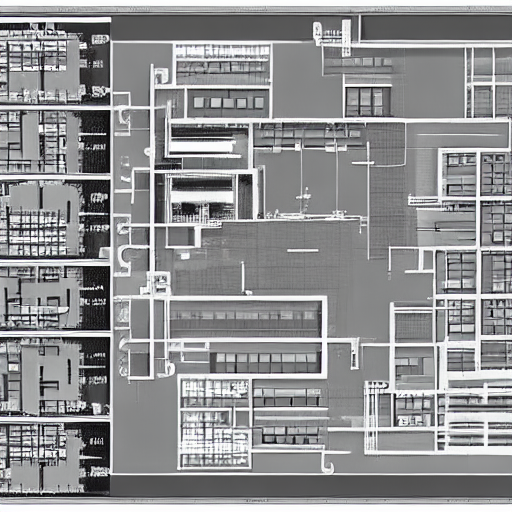

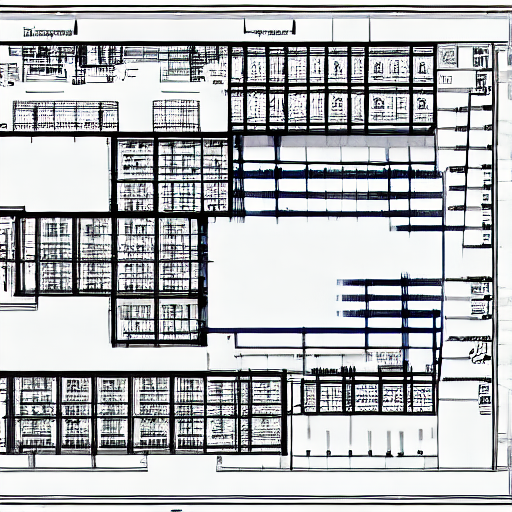

In [2]:
from diffusers import StableDiffusionPipeline
from safetensors.torch import load_file
import torch
from PIL import Image  # Для отображения изображения

# Базовая модель Stable Diffusion
base_model = "runwayml/stable-diffusion-v1-5"

# Загрузка пайплайна
pipe = StableDiffusionPipeline.from_pretrained(base_model, torch_dtype=torch.float16)
pipe.to("cuda")  # Используйте GPU

# Загрузка LoRA модели
lora_weights = "courseworkmodel.safetensors"
state_dict = load_file(lora_weights)

# Применение LoRA к модели
for key, value in state_dict.items():
    if key in pipe.unet.state_dict():
        pipe.unet.state_dict()[key].copy_(value)

# Генерация изображения
prompt = "Monochrome technical architectural blueprint, detailed plan of the industrial site. VST V=10000m3 4 things, VST V=100m3 8 things, HST V=75m3 5 things, HST V=50m3 8 things. Precise and professional schematic style, fine linework"

truncated_prompt = pipe.tokenizer(prompt, max_length=75, truncation=True)["input_ids"]
prompt = pipe.tokenizer.decode(truncated_prompt)

# Увеличение количества шагов
num_inference_steps = 150  

# Генерация изображения
image = pipe(prompt, num_inference_steps=num_inference_steps).images[0]


# Сохранение изображения
image.save("generated_image.png")
print("Изображение сохранено как 'generated_image.png'")

# Отображение изображения
image.show()  # Открывает изображение в стандартной программе просмотра


100%|██████████| 150/150 [00:52<00:00,  2.88it/s]


Изображение сохранено как 'generated_image.png'


In [10]:
from safetensors.torch import load_file
from transformers import CLIPModel

model = CLIPModel.from_pretrained("C:/pinokio/api/fluxgym.git/models/unet/bdsqlsz/flux1-dev2pro-single/flux1-dev2pro.safetensors")

# Загрузка весов LoRA
lora_weights = "courseworkmodel.safetensors"
lora_state_dict = load_file(lora_weights)

# Применение весов LoRA к модели
model.apply_lora(lora_state_dict)

# Генерация изображения
prompt = "A futuristic cityscape at sunset, highly detailed, cinematic"
image = model.generate_image(prompt)

# Сохранение изображения
image.save("generated_image.png")
print("Изображение сохранено как 'generated_image.png'")


OSError: Incorrect path_or_model_id: 'C:/pinokio/api/fluxgym.git/models/unet/bdsqlsz/flux1-dev2pro-single/flux1-dev2pro.safetensors'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [ ]:
import torch
from diffusers import FluxPipeline

# Укажите путь к вашей локальной модели или используйте идентификатор модели из репозитория
model_path = "bdsqlsz/flux1-dev2pro-single"

# Загрузка модели FluxPipeline
pipe = FluxPipeline.from_pretrained(model_path, torch_dtype=torch.bfloat16)

# Задание текста для генерации
prompt = "Monochrome technical architectural blueprint, detailed plan of the industrial site. VST V=10000m3 4 things, VST V=100m3 8 things, HST V=75m3 5 things, HST V=50m3 8 things. Precise and professional schematic style, fine linework"
seed = 42  # Фиксированный seed для повторяемости результата

# Генерация изображения
image = pipe(
    prompt,
    output_type="png",  
    num_inference_steps=4,  # Больше шагов для лучшего качества
    generator=torch.Generator("cuda").manual_seed(seed)  # Фиксация генератора
).images[0]

# Сохранение изображения
image.save("generated_image.png")
print("Изображение сохранено как 'generated_image.png'")

image.show()


ValueError: The provided pretrained_model_name_or_path "C:/pinokio/api/fluxgym.git/models/unet/bdsqlsz/flux1-dev2pro-single/flux1-dev2pro.safetensors" is neither a valid local path nor a valid repo id. Please check the parameter.

In [1]:
import torch
from diffusers import FluxPipeline
from safetensors.torch import load_file

# Укажите путь к вашей локальной модели
model_path = "black-forest-labs/FLUX.1-schnell"

# Загрузка модели FluxPipeline
pipe = FluxPipeline.from_pretrained(model_path, torch_dtype=torch.bfloat16)
pipe.enable_model_cpu_offload() 

# Загрузка LoRa весов
lora_weights_path = "courseworkmodel.safetensors"
lora_state_dict = load_file(lora_weights_path)

for attr in dir(pipe):
    print(attr)


# # Применение весов LoRa к UNet
# def apply_lora_weights(unet, lora_state_dict):
#     """Функция для применения весов LoRa к UNet."""
#     unet_state_dict = unet.state_dict()
#     for name, param in lora_state_dict.items():
#         if name in unet_state_dict:
#             with torch.no_grad():
#                 unet_state_dict[name].add_(param)

# apply_lora_weights(pipe.unet, lora_state_dict)

# # Задание текста для генерации
# prompt = "Monochrome technical architectural blueprint, detailed plan of the industrial site. VST V=10000m3 4 things, VST V=100m3 8 things, HST V=75m3 5 things, HST V=50m3 8 things. Precise and professional schematic style, fine linework"
# seed = 42  # Фиксированный seed для повторяемости результата

# # Генерация изображения
# image = pipe(
#     prompt,
#     output_type="png",  # Используйте PIL, чтобы сохранить изображение позже
#     num_inference_steps=4,  # Больше шагов для лучшего качества
#     generator=torch.Generator("cuda").manual_seed(seed)  # Фиксация генератора
# ).images[0]

# # Сохранение изображения
# image.save("generated_image.png")
# print("Изображение сохранено как 'generated_image.png'")

# # Отображение изображения
# image.show()


c:\Users\nadyl\Desktop\kursovaya\.venv_lora\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  3.86it/s]


__call__
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattr__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_all_hooks
_best_guess_weight_name
_callback_tensor_inputs
_check_text_inv_inputs
_deprecated_kwargs
_dict_from_json_file
_exclude_from_cpu_offload
_execution_device
_extend_tokens_and_embeddings
_fetch_state_dict
_get_clip_prompt_embeds
_get_init_keys
_get_signature_keys
_get_signature_types
_get_t5_prompt_embeds
_internal_dict
_is_onnx
_load_connected_pipes
_lora_loadable_modules
_maybe_convert_prompt
_offload_device
_offload_gpu_id
_optional_components
_optionally_disable_offloading
_pack_latents
_prepare_latent_image_ids
_retrieve_tokens_and_embeddings
_unpack_latents
_upload_folder
check_inputs
components
config
config_name
default_sample_size
delete_adapters
device
disable_attention_slicing
disable

In [1]:
from diffusers import FluxPipeline
import torch
import os

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Укажите путь к вашей локальной модели
model_path = "black-forest-labs/FLUX.1-schnell"

pipe = FluxPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# # Загрузка модели FluxPipeline
# pipe = FluxPipeline.from_pretrained(model_path, torch_dtype=torch.bfloat16)
# # pipe.to('cuda')
# pipe.enable_model_cpu_offload()  # Использование оптимизации для CPU

# Включение LoRA
pipe.enable_lora()

# Загрузка LoRa весов
lora_weights_path = "courseworkmodel.safetensors"
pipe.load_lora_weights(lora_weights_path)

# Задание текста для генерации
prompt = "Monochrome technical architectural blueprint, detailed plan of the industrial site. VST V=10000m3 4 things, VST V=100m3 8 things, HST V=75m3 5 things, HST V=50m3 8 things. Precise and professional schematic style, fine linework"
seed = 42  # Фиксированный seed для повторяемости результата

# Генерация изображения
image = pipe(
    prompt,
    output_type="png", 
    num_inference_steps=4,  # Больше шагов для лучшего качества
    generator=torch.Generator("cuda").manual_seed(seed)  # Фиксация генератора
).images[0]

# Сохранение изображения
image.save("generated_image.png")
print("Изображение сохранено как 'generated_image.png'")

# Отображение изображения
image.show()


c:\Users\nadyl\Desktop\kursovaya\.venv_lora\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [02:31<00:00, 21.64s/it]
c:\Users\nadyl\Desktop\kursovaya\.venv_lora\lib\site-packages\torch\nn\modules\module.py:1326: UserWarning: expandable_segments not supported on this platform (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10/cuda/CUDAAllocatorConfig.h:28.)
  return t.to(


OutOfMemoryError: CUDA out of memory. Tried to allocate 160.00 MiB. GPU 0 has a total capacity of 4.00 GiB of which 0 bytes is free. Of the allocated memory 10.83 GiB is allocated by PyTorch, and 14.28 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
pip install --upgrade diffusers transformers peft


In [ ]:
pip install protobuf

In [ ]:
pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124